## Fantasy Wrap-up for 2016 D-I College Nationals

We'll scrape data from the USAU website to [find the winner of /r/ultimate's fantasy lineup contest](https://www.reddit.com/r/ultimate/comments/4l74rn/fantasy_lineup_di_college_nationals_2016/), and along the way find which players made the biggest score contributions at nationals, and how that correlated with users' fantasy valuations.

All of the following is being run in a [jupyter notebook](http://jupyter.org/), which anyone can modify and run after installing python and a few other dependencies. Further instructions can be found in the github README.

We first set up some simple imports and display settings.

In [1]:
import usau.reports
import usau.fantasy

In [2]:
from IPython.display import display, HTML
import pandas as pd
pd.options.display.width = 200
pd.options.display.max_colwidth = 200
pd.options.display.max_columns = 200

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

First we'll need to scrape data from the USAU website. I've also downloaded the data offline in the form of csvs, and the following cell instructs to load the data from these csvs instead of scraping the website on-the-fly. (A wrapper script for downloading the data can be found in `usau/download_reports.py`.) Stat-keeping seemed to be done pretty comprehensively this tournament, with [only a couple of women's consolation games](../notebooks/2016-D-I_College_Nationals_Data_Quality.ipynb) missing player statistics.

In [3]:
# Read data from csv files
usau.reports.d1_college_nats_men_2016.load_from_csvs()
usau.reports.d1_college_nats_women_2016.load_from_csvs()
None  # No output

Let's also retrieve the fantasy picks from the /r/ultimate fantasy competition:

In [4]:
mens_fantasy, womens_fantasy, contest_users = usau.fantasy.compute_fantasy_picks()
display_cols = ["No.", "Name", "Fantasy Score", "Position", "Height",
                "Goals", "Assists", "Ds", "Turns",
                "Team", "Seed", "Fantasy Picks"]

And without further ado, the winner of the fantasy competition is [/u/ultimatefrisbee](http://reddit.com/u/ultimatefrisbee), with [/u/scottyskin96](http://reddit.com/u/scottyskin96) and [/u/duthracht](http://reddit.com/u/duthracht) respectively scoring the highest in the Men's and Women's competitions.

In [5]:
usau.fantasy.compute_fantasy_contest_results(display=False).reset_index(drop=True).style \
  .bar(subset=["Total", "Women's"],
       color='rgba(80, 200, 100, 0.5)') \
  .bar(subset=["Men's"],
       color='rgba(200, 80, 80, 0.5)')

/spare/local/azhu/venv_el6-usau-stonelib/lib/python2.7/site-packages/usau/fantasy.py:81: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  .sort(["Fantasy Score", "Seed"], ascending=False))
/spare/local/azhu/venv_el6-usau-stonelib/lib/python2.7/site-packages/usau/fantasy.py:116: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  results = results.sort("Total", ascending=False)[["User", "Total", "Men's", "Women's"]]


### A look at the player statistics

Here are all players picked in fantasy, mixed with the other top fantasy point scoring athletes. "Fantasy point score" here is arbitrarily defined by the formula $G + A + 0.2 \times D - 0.2 \times T$. Ds and turns were weighted lightly mostly because I was worried that they might not be kept very accurately, but it seems the stat-keepers did a good job following these!

In [6]:
usau.fantasy.compute_athlete_fantasy_scores(mens_fantasy, min_players=25)[display_cols].style \
  .bar(subset=['Fantasy Score', 'Goals', 'Ds', 'Fantasy Picks'],
             color='rgba(80, 200, 100, 0.5)') \
  .bar(subset=['Assists', 'Turns'],
             color='rgba(200, 80, 80, 0.5)')

At a glance, its clear the dynamic duos of the two teams which made it the deepest, Stubbs and Vandenberg of Harvard and Osgar and Jagt of Minnesota, racked up the most impressive stat lines of the tournaments. Osgar in particular managed this despite sitting out the Minnesota's semifinal win with a knee injury, and playing through the same injury in the finals.

In [7]:
usau.fantasy.compute_athlete_fantasy_scores(womens_fantasy, min_players=25)[display_cols].style \
  .bar(subset=['Fantasy Score', 'Goals', 'Ds', 'Fantasy Picks'],
             color='rgba(80, 200, 100, 0.5)') \
  .bar(subset=['Assists', 'Turns'],
             color='rgba(200, 80, 80, 0.5)')

It is perhaps surprising then that the top women's stat lines belonged to the Dartmouth duo Angela Zhu and Jaclyn Verzuh, as Dartmouth exited the tournament in the quarterfinals, playing a whole 3 fewer games than the finalists Stanford and Whitman. This is not to take away anything from Gegg/White and Hardesty/Revere, who anchored the deeper lines of their respective teams and put in respectable stats too.

Let's get a graphical sense of the higheset performers:

In [8]:
# Clean up the data a little bit
mens_fantasy_clean = usau.fantasy.compute_athlete_fantasy_scores(mens_fantasy, min_players=len(mens_fantasy))[display_cols]
womens_fantasy_clean = usau.fantasy.compute_athlete_fantasy_scores(womens_fantasy, min_players=len(womens_fantasy))[display_cols]
mens_fantasy_clean["Gender"] = "Men"
womens_fantasy_clean["Gender"] = "Women"
fantasy_clean = pd.concat([mens_fantasy_clean, womens_fantasy_clean]).sort(columns=["Fantasy Score"], ascending=False)
# Plotting styles
style_args = {"alpha": 0.5, "markeredgewidth": 0.5}
sns_blue, sns_green, sns_red, sns_magenta, sns_yellow, sns_cyan = sns.color_palette()

/spare/local/azhu/venv_el6-usau-stonelib/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


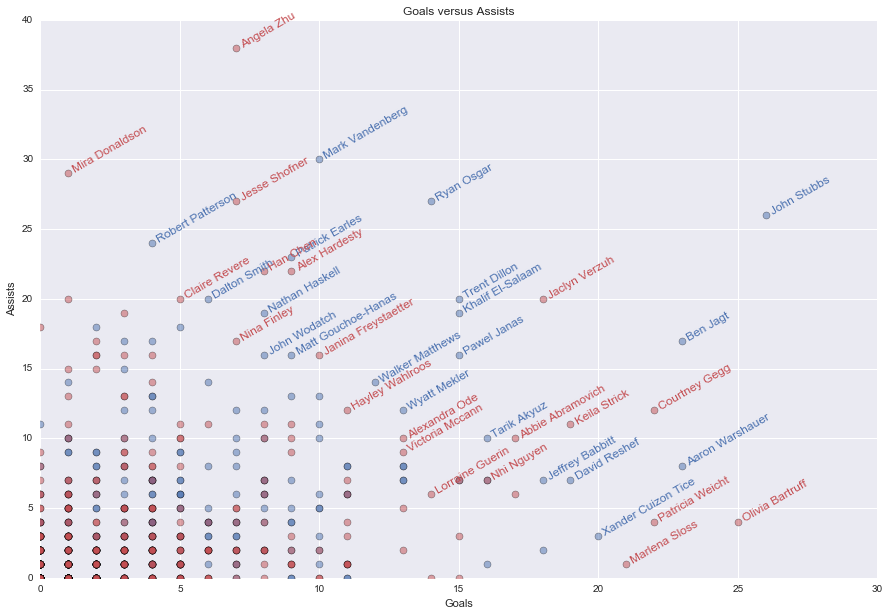

In [9]:
# Plot goals versus assists, labelling the top 20 performers of both genders
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(mens_fantasy_clean.Goals, mens_fantasy_clean.Assists, "o", color=sns_blue, **style_args)
ax.plot(womens_fantasy_clean.Goals, womens_fantasy_clean.Assists, "o", color=sns_red, **style_args)
for _, row in mens_fantasy_clean.head(20).iterrows():
  adjustment = 0.2
  ax.annotate(row["Name"], xy=(row["Goals"] + adjustment, row["Assists"] + adjustment),
              ha='left', va='center', rotation=30, wrap=True, color=sns_blue)
for _, row in womens_fantasy_clean.head(20).iterrows():
  adjustment = 0.2
  ax.annotate(row["Name"], xy=(row["Goals"] + adjustment, row["Assists"] + adjustment),
              ha='left', va='center', rotation=30, wrap=True, color=sns_red)
ax.set_xlabel("Goals")
ax.set_ylabel("Assists")
ax.set_title("Goals versus Assists")

John Stubb's contributions across the tournament can't be understated; he excelled at both sides of the disc, catching the most goals across both genders while also having the sixth highest assist count (behind only Osgar and teammate Vandenberg on the men's side).

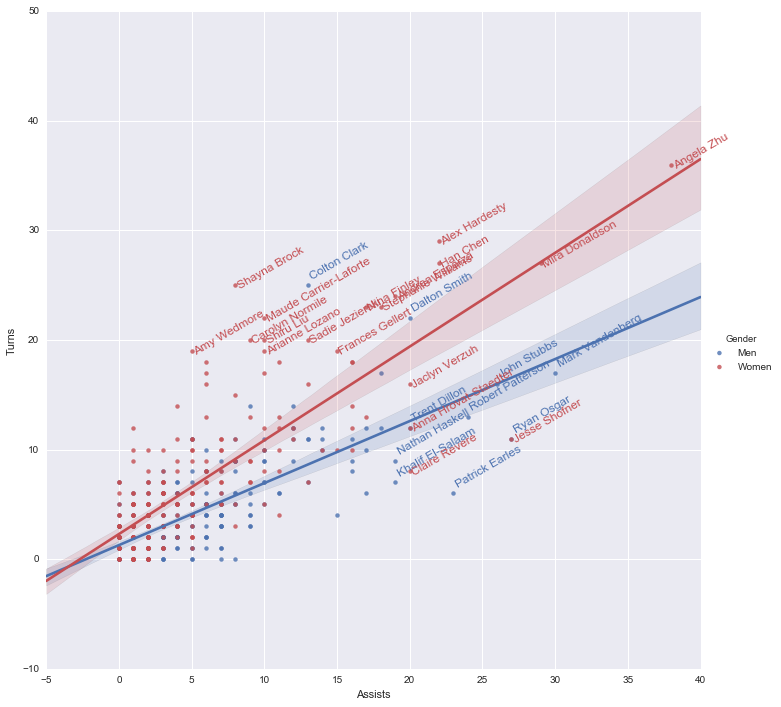

In [10]:
# Plot assists versus turns, labelling the top values of both genders
# Using the top 500 players by fantasy (at least 2 scores/assists) to prune some of the null data
g = sns.lmplot("Assists", "Turns", fantasy_clean.head(500), hue="Gender",
               size=10, palette={"Men": sns_blue, "Women": sns_red})
for _, row in mens_fantasy_clean[(mens_fantasy_clean.Assists > 18) |
                                 (mens_fantasy_clean.Turns > 18)].iterrows():
  adjustment = 0.2
  g.ax.annotate(row["Name"], xy=(row["Assists"] + adjustment, row["Turns"] + 0.8),
                ha='left', va='center', rotation=30, wrap=True, color=sns_blue)
for _, row in womens_fantasy_clean[(womens_fantasy_clean.Assists > 18) |
                                   (womens_fantasy_clean.Turns > 18)].iterrows():
  adjustment = 0.2
  g.ax.annotate(row["Name"], xy=(row["Assists"] + adjustment, row["Turns"] - 0.1),
                ha='left', va='center', rotation=30, wrap=True, color=sns_red)

Not surprisingly, the backfield players shouldering the responsibility for distributing the disc tended to have more turnovers. For the number of touches Angela Zhu had, her turnover ratio was still quite respectable compared to other elite handlers (Hardesty, Lozano Chen). On the men's side, Pat Earles stood out with the best assist/turnover ratio, despite a reputation of being trigger-happy. For example, he threw more assists than Dalton Smith, with 3x fewer turnovers. Of course, a considerable amount of this has to be attributed to Pittsburgh's offensive prowess.

### Fantasy valuations

How good was /r/ultimate at predicting the best fantasy players? Not that bad, really.

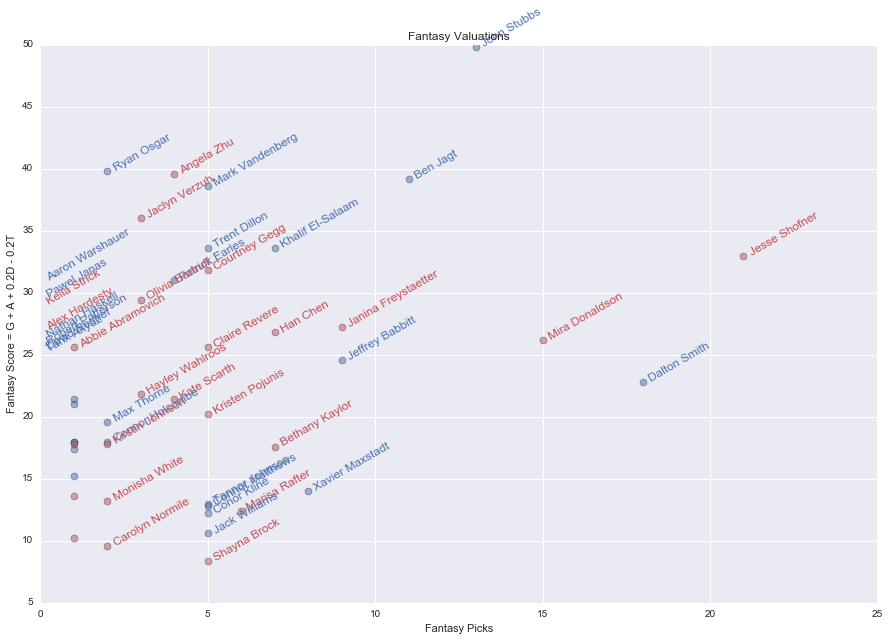

In [11]:
# Plot goals versus assists, labelling the top 20 performers of both genders
fig, ax = plt.subplots(figsize=(15, 10))
mens_fantasy_pos = mens_fantasy_clean[mens_fantasy_clean["Fantasy Picks"] > 0]
womens_fantasy_pos = womens_fantasy_clean[womens_fantasy_clean["Fantasy Picks"] > 0]
ax.plot(mens_fantasy_pos["Fantasy Picks"], mens_fantasy_pos["Fantasy Score"], "o", color=sns_blue, **style_args)
ax.plot(womens_fantasy_pos["Fantasy Picks"], womens_fantasy_pos["Fantasy Score"], "o", color=sns_red, **style_args)

for _, row in fantasy_clean[(fantasy_clean["Fantasy Picks"] > 1) |
                            (fantasy_clean["Fantasy Score"] > 25)].iterrows():
  adjustment = 0.2
  color = sns_blue if row["Gender"] == "Men" else sns_red
  ax.annotate(row["Name"], xy=(row["Fantasy Picks"] + adjustment, row["Fantasy Score"] + adjustment),
              ha='left', va='center', rotation=30, wrap=True, color=color)
ax.set_xlabel("Fantasy Picks")
ax.set_ylabel("Fantasy Score = G + A + 0.2D - 0.2T")
ax.set_title("Fantasy Valuations")

Ryan Osgar has to win the title for "most valuable pick", being picked only twice (including by yours truly) while having the second highest fantasy score line. Although he was Minnesota's Callahan nominee, most users opted to go for his teammate Ben Jagt, who also ended with a similar fantasy score line. On the women's side, Dartmouth duo Zhu and Verzuh were the highest scoring players on fantasy, although most users opted for Jesse Shofner.

Ultimately, the best picks mostly came down to whether the team managed to survive deep into the tournament. UMass and UNC-W were eliminated by pre-quarters, limiting the scoring impacts of Tanner Johnson, Conor Kline, Jack Williams, and Xavier Maxstadt. UCF Shayna Brock seemed like a good choice prior to the tournament, due to the tight rotation UCF runs allowing Brock to get a lot of touches, but the same tight rotation (plus injuries) caused UCF to exhaust themselves early out of the tournament. Brock ended the tournament with 25 Turns and only 12 score contributions.

There were several strong picks who were passed over entirely by /r/ultimate, despite plenty of name recognization. Namely: Warshaeur (UNC) and Pawel Janas (Colorado) on the Men's side, and Keila Strick (Virginia) and Hardesty (Whitman) on the Women's side. The best lines with 0 /r/ultimate picks would be:

* Men's: **Aaron Warshauer (North Carolina)**, Pawel Janas (Colorado), Nathan Haskell (Georgia), Robert Patterson (Florida State), David Reshef (Harvard), Tarik Akyuz (Case Western Reserve), Walker Matthews (North Carolina)
* Women's: **Keila Strick (Virginia)**, Alex Hardesty (Whitman), Patricia Weicht (Colorado College), Alexandra Ode (Oregon), Nhi Nguyen (Colorado), Marlena Sloss (Whitman), Lorraine Guerin (Wisconsin)

In [12]:
# mens_fantasy_clean["Name (Team)"] = mens_fantasy_clean.apply(
#     lambda row: "{name} ({team})".format(name=row["Name"], team=row["Team"]), axis=1)
# womens_fantasy_clean["Name (Team)"] = womens_fantasy_clean.apply(
#     lambda row: "{name} ({team})".format(name=row["Name"], team=row["Team"]), axis=1)
mens_best_no_pick = mens_fantasy_clean[mens_fantasy_clean["Fantasy Picks"] == 0].head(7)["Name"].values
womens_best_no_pick = womens_fantasy_clean[womens_fantasy_clean["Fantasy Picks"] == 0].head(7)["Name"].values
mens_best_no_pick[0] = mens_best_no_pick[0] + "*"
womens_best_no_pick[0] = womens_best_no_pick[0] + "*"
usau.fantasy.compute_fantasy_contest_results(from_csv=True, min_players=0, display=False,
                                             fantasy_input={"no_r_ultimate": {"Men": mens_best_no_pick, "Women": womens_best_no_pick}})

,User,Total,Men's,Women's
0,no_r_ultimate,417.6,219.2,198.4


Not bad, but also not great -- excluding /r/ultimate's picks, one could have still placed about midway in the fantasy contest. /r/ultimate did a good job of picking the top end picks for both gender divisions.

### Fantasy variations

Just for fun, how would things have shaken up if the rules for fantasy had been perturbed a little bit? What happens if (1): we remove the captain multiplier, (2): we increase the weight of Ds and Turns, (3): we increase the weight of Ds and Turns even more?

In [13]:
usau.fantasy.compute_fantasy_contest_results(from_csv=True, min_players=0,
                                             display=False, captain_multiplier=1).head(5)

,User,Total,Men's,Women's
12,ultimatefrisbee,402.6,219.0,183.6
7,grhgra002,386.8,210.8,176.0
11,scottyskin96,373.8,210.4,163.4
5,duthracht,370.6,185.2,185.4
6,giftedbadly,369.6,185.4,184.2


In [14]:
usau.fantasy.compute_fantasy_contest_results(from_csv=True, min_players=0,
                                             display=False, beta=0.5).head(5)

,User,Total,Men's,Women's
12,ultimatefrisbee,427.0,237.0,190.0
11,scottyskin96,418.5,239.5,179.0
7,grhgra002,401.5,213.5,188.0
3,chubs45,399.5,204.5,195.0
8,krdonnie,396.0,236.5,159.5


In [15]:
usau.fantasy.compute_fantasy_contest_results(from_csv=True, min_players=0,
                                             display=False, beta=1.0).head(5)

,User,Total,Men's,Women's
12,ultimatefrisbee,368.0,211.0,157.0
11,scottyskin96,355.0,205.0,150.0
3,chubs45,348.0,182.0,166.0
10,samth,341.0,189.0,152.0
7,grhgra002,333.0,180.0,153.0


Sigh, alright, /u/ultimatefrisbee, looks like we can't push you off the pedestal!

Have other thoughts for content you'd like to see? Please let me know, azjps@github or azjps@reddit.